### Data 620 Final Project
 

### Election 2020 Tweets  Sentiment Analysis 

The 2020 United States presidential election was the 59th quadrennial presidential election, held  on Tuesday, November 3, 2020. The Democratic ticket of former vice president Joe Biden and incumbent U.S. senator from California Kamala Harris defeated the Republican ticket of incumbent president Donald Trump and vice president Mike Pence.
In this project we will analayze the sentiments of the  tweets about the general election and build a model to predict sentimenets of new tweets. 

### Twitter Data 

We pullled twitter data using tweepy. We pulled 10,000 tweets, starting from 11/1/2020,  with hash tags **#Elections2020**, **#Elections20** and **#Elections**. We exclueded retweets with these hash tags. 


### Sentiment Analysis

We will  perform sentiment analysis on 10000 tweets that have the hashtag **#Elections2020** OR **#Elections2020**  OR **#Elections20** OR **#Elections**. We will classify each tweet text as positive, neutral, or negative. 

For each sentiment class, we're going to analyze associated hashtags and location. 

We will use **TextBlob** package for sentiment analysis:
    https://textblob.readthedocs.io/en/dev/


### Load Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import re 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from nltk.corpus import stopwords
from sklearn.metrics import classification_report


### Load Tweets 

Tweets were downloaded using tweepy and saved to a csv file.We manually cleaned up location data. Retrieved data contained many reocrds with invalid lcoation data. This might be due to people not providing location access on their devices, using VPN or other privacy meausers.  For this analysis we are using USA, Other(excluding USA) and Unknow(blank locations) as locations. 

In [2]:
tweets_df = pd.read_csv("elections.csv")

We created pandas dataframe with 10000 rows and 6 colummns.
Table below displays few records. 

In [3]:
tweets_df.shape

(10000, 6)

In [4]:
tweets_df.head(10)

,Unnamed: 0,tweet_id,created_at,user,location,text
0,0,'1334328760099889157,12/3/2020 2:49,Koutchboom,USA,Its nice to know democrats got better at riggi...
1,1,'1334328694698020865,12/3/2020 2:48,MischellUtter,USA,@AdamInHTownTX @justinbaragona There will be h...
2,2,'1334328653958754304,12/3/2020 2:48,TylerHauf1,USA,@J_Mei21 Democrats are doing the same cannibal...
3,3,'1334328651626606597,12/3/2020 2:48,leftcoastbabe,Unknown,"Can we call them ""The Gang who couldn't Sue St..."
4,4,'1334328646832709632,12/3/2020 2:48,Democratsoppre1,Unknown,@JamesOKeefeIII @CNN @cynthiacnn If you voted ...
5,5,'1334328638821474309,12/3/2020 2:48,thejoshuablog,USA,Via @RawStory: Trump’s new Wisconsin election ...
6,6,'1334328638356000768,12/3/2020 2:48,Libertea2012,USA,Trump’s new Wisconsin election lawsuit targets...
7,7,'1334328637286309888,12/3/2020 2:48,rogue_corq,Other,Trump’s new Wisconsin election lawsuit targets...
8,8,'1334328607196372992,12/3/2020 2:48,joseseb86647200,Unknown,@realDonaldTrump MR.PRESIDENT LET THE MILITARY...
9,9,'1334328603534786560,12/3/2020 2:48,VikkiMarshall4,USA,"In Video, Trump Unspools Unsubstantiated Voter..."


### Tweets by Location

Twitter API allows us to pull user location of the tweets. These are location prvoided  by the users themselves. Because the data set is small, we were able to manage to clean up the location into a standardized format. We also classified the location as **United States**  **Other** or **Unknown**.
As expected, most of the twettes were from USA.
A summary of tweets by location is displayed below/

In [5]:
tweets_by_location = tweets_df.groupby(['location'])['tweet_id'].count()
other_count = tweets_by_location['Other']
unknown_count = tweets_by_location['Unknown']
unitedStates_count = tweets_by_location['USA']
tweets_by_location = tweets_df.groupby(['location'])['tweet_id'].count()

United States   :  5168  52%
Other Countries :  950   10%
Unknown         :  3882  39%


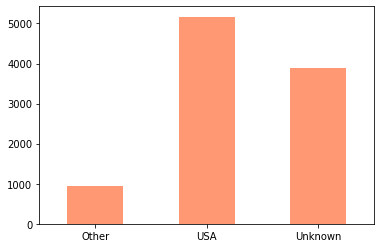

In [6]:

 
print("United States   :  "+ str(tweets_by_location[1]) + "  {0:.0f}%".format(unitedStates_count/10000 * 100))
print("Other Countries :  "+str(tweets_by_location[0])  + "   {0:.0f}%".format(other_count/10000 * 100))
print("Unknown         :  " + str(tweets_by_location[2])+ "  {0:.0f}%".format(unknown_count/10000 * 100))
tweets_by_location.plot(kind='bar', alpha=0.8, rot=0, color='#FF7F50')
plt.xlabel('')
plt.show()


**Functions**

Below we define few functions for cleaning tweets (remove links and special characters), for creating word cloud and for getting sentiment output for a tweet. <br>

In [7]:
#clean tweet text by removing links, special characters using simple regex statements
def clean_tweet(tweet_text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet_text).split()) 

#classify sentiment of passed tweet using textblob's sentiment method 
def get_tweet_sentiment(tweet_text): 
        analysis = TextBlob(tweet_text) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

def get_tweet_sentiment_polarity(tweet_text): 
         analysis = TextBlob(tweet_text)
         return analysis.polarity
        
#for plotting horizontal bar plots
def plot_location(data):
    ax = data.plot(kind='barh', x='location', y='count', alpha=0.8, figsize=(10, 12), 
                                   color='#86bf91', zorder=2, width=0.6, legend=0)
    #Source: https://mode.com/example-gallery/python_horizontal_bar/
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

    #clear axis labels
    plt.xlabel('')
    plt.ylabel('')
    
    
def plotWordCloud(data) :

    df = tweets_df[data]

    words = ' '.join(df['clean_text'])

    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and not word.startswith('&')
                                    and not word.startswith('wa')
                                    and not word.startswith('now')
                                    and word != 'RT'
                                ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',contour_width=1, contour_color='steelblue',
                          width=3000,
                          height=2000
                         ).generate(cleaned_word)

    plt.figure(1,figsize=(15, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


    
tweets_df['clean_text'] = tweets_df['text'].apply(clean_tweet)


### Stopwords

We are analyzing tweets about elections so there is no point including the word elections in our analysis. 
We will consider elections to be a stopword.

In [8]:
STOPWORDS.add('election')
STOPWORDS.add('S')
STOPWORDS.add('elections')
STOPWORDS.add('elections2020')
STOPWORDS.add('elections20')
STOPWORDS.add('vote')

Word cloud below display most frequently used words.  
Vote, Trump, win, will, people and Republican are some of the most frequently appearing words. 
This is 


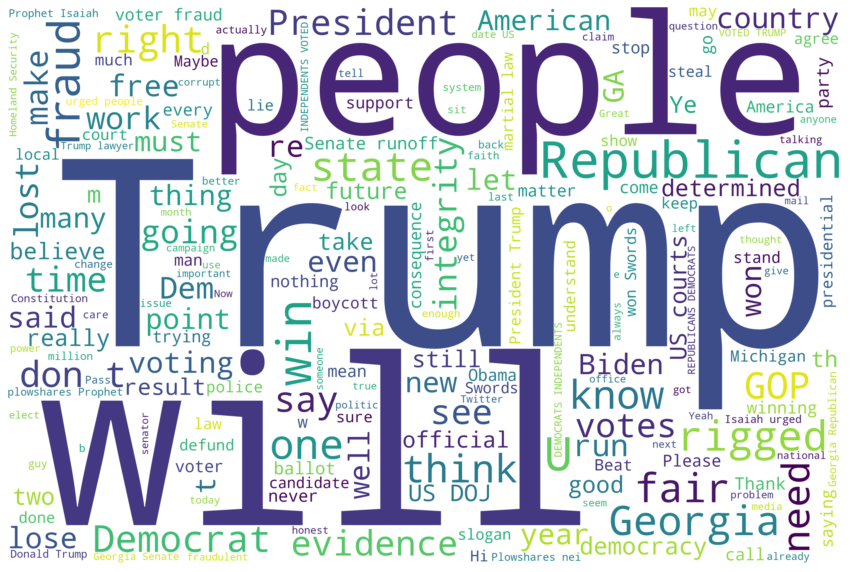

In [9]:
df = tweets_df

words = ' '.join(df['clean_text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith('wa')
                                and not word.startswith('now')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',contour_width=1, contour_color='steelblue',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word)

plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Sentiment Analysis 

We are using **TextBlob** to perfrom Sentiment Analysis. 
 
<i>TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.</i>

The function call <code>TextBlob(tweet_text)</code> returns a sentiment polarity score. 

- Sentiment polarity score > 0 evaluates to a positive sentiment
- Sentiment polarity score = 0 evaluates to a neutral sentiment
- Sentiment polarity score < 0 evalutes to a negative sentiment

Source: https://textblob.readthedocs.io/en/dev/_modules/textblob/blob.html

In [10]:
tweets_df['sentiment'] = tweets_df['clean_text'].apply(get_tweet_sentiment)
tweets_df['sentiment_polarity'] = tweets_df['clean_text'].apply(get_tweet_sentiment_polarity)

In [11]:
tweets_df.head()

,Unnamed: 0,tweet_id,created_at,user,location,text,clean_text,sentiment,sentiment_polarity
0,0,'1334328760099889157,12/3/2020 2:49,Koutchboom,USA,Its nice to know democrats got better at riggi...,Its nice to know democrats got better at riggi...,positive,0.550000
1,1,'1334328694698020865,12/3/2020 2:48,MischellUtter,USA,@AdamInHTownTX @justinbaragona There will be h...,There will be human errors in elections there ...,neutral,0.000000
2,2,'1334328653958754304,12/3/2020 2:48,TylerHauf1,USA,@J_Mei21 Democrats are doing the same cannibal...,_Mei21 Democrats are doing the same cannibalis...,negative,-0.400000
3,3,'1334328651626606597,12/3/2020 2:48,leftcoastbabe,Unknown,"Can we call them ""The Gang who couldn't Sue St...","Can we call them ""The Gang who couldn't Sue St...",positive,0.168182
4,4,'1334328646832709632,12/3/2020 2:48,Democratsoppre1,Unknown,@JamesOKeefeIII @CNN @cynthiacnn If you voted ...,If you voted for Trump And people fell into it...,neutral,0.000000


**Sentiment Analysis**

Based on the result below, we see that 45% of tweets are netural and 37% are positive and 18% are negative. 
The results were suprirsing, We expected a higher percentange of negative tweets given how the what is happening. 

Positive  : 3672  37%
Neutral   : 4545  45%
Negative  : 1783  18%


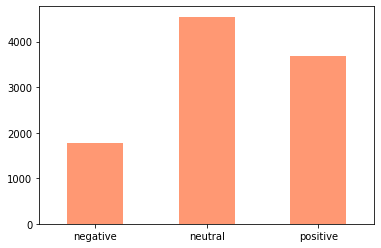

In [12]:

tweets_by_type = tweets_df.groupby(['sentiment'])['tweet_id'].count()
positive_count = tweets_by_type['positive']
negative_count = tweets_by_type['negative']
neutral_count = tweets_by_type['neutral']
size = len(tweets_df.index)
print("Positive  : "+ str(positive_count)   + "  {0:.0f}%".format(positive_count/size * 100))
print("Neutral   : "  + str(neutral_count)  + "  {0:.0f}%".format(neutral_count/size * 100))
print("Negative  : "  + str(negative_count) + "  {0:.0f}%".format(negative_count/size * 100))

tweets_by_type.plot(kind='bar', alpha=0.8, rot=0, color='#FF7F50')
plt.xlabel('')
plt.show()

### Reviewing the Tweets

Because the nature of this presidential election, we anticipated alot of the tweets should be positive or negative.  Some of the results sound more neutral and some may contain some negative keywords but the meaning is not necessarily negative. 

**Negative tweets**

In [13]:

negative_tweets = tweets_df.loc[tweets_df['sentiment'] == 'negative']['clean_text']
pd.set_option('display.max_colwidth', -1)
negative_tweets.sample(10).reset_index(drop=True)



0    But people have no problem with trusting these people telling us there isn’t anything wrong with our elections.           
1    If y’all wanna see stuck on stupid just watch He don’t know jack about this issue Who does CONSER                         
2    Jacob says an elections worker threw a badge at her at some point Giuliani "Were you shocked at the level of crookedness?"
3    You seem to be confusing tactics with strategy The overall strategy to drain the swamp is to fix the                      
4    It’s a stupid slogan and an example why the left wing loses elections consistently when they have genu                    
5    Elections for the past decade or so have had approximately 60-65 million votes per candidate all of a sudden 2020         
6    They're hard at work undermining 2022 elections already.                                                                  
7    Wrong She is invoking the Federal Contested Elections Act This turns the election over to a h      

Below we will analyse negative sentitment word distribution. 

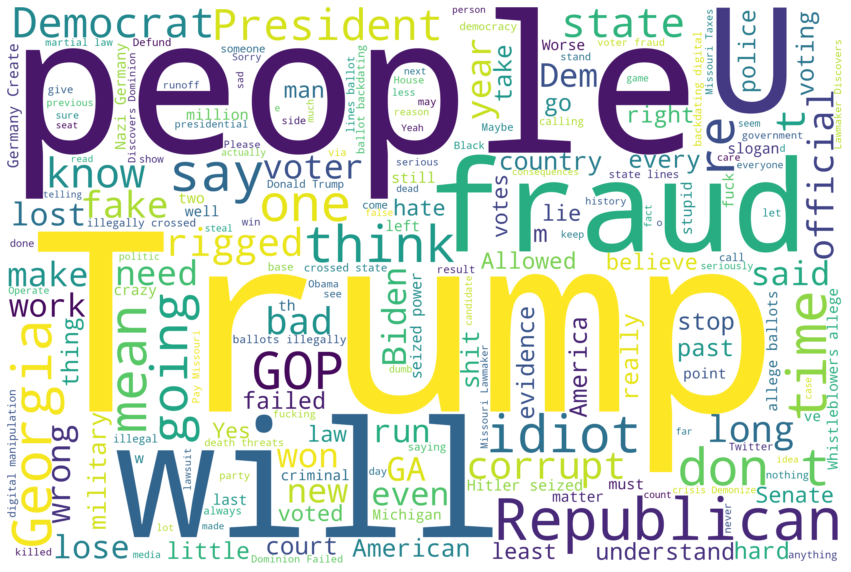

In [14]:
plotWordCloud(tweets_df['sentiment']=='negative')


**Positive Tweets**


In [15]:
positive_tweets = tweets_df.loc[tweets_df['sentiment'] == 'positive']['clean_text']
positive_tweets.sample(10).reset_index(drop=True)

0    Dr Shiva Ayyadurai 's Arizona hearing testimony confirmed federal electio                                          
1    That's been his shtick the whole time But something he said really stuck in my craw "Elections have consequences.  
2    “Elections must be trustworthy and ACCURATE!”                                                                      
3    Jockeying for jobs Tensions simmer inside Biden transition as new administration takes shape                       
4    Capitalism can't be destroyed by its own rules If you want to oppose the tyranny of capital understand that US el  
5    I think what lost elections was more along the lines of "No to universal healthcare" "No to reformi                
6    Major change likely in Congress before local body elections                                                        
7    Heres the deal The revolt of real voters in Georgia against the GOP is very real Libe                              
8    In New York City for exampl

Below we will analyze positive sentitment word distribution. 

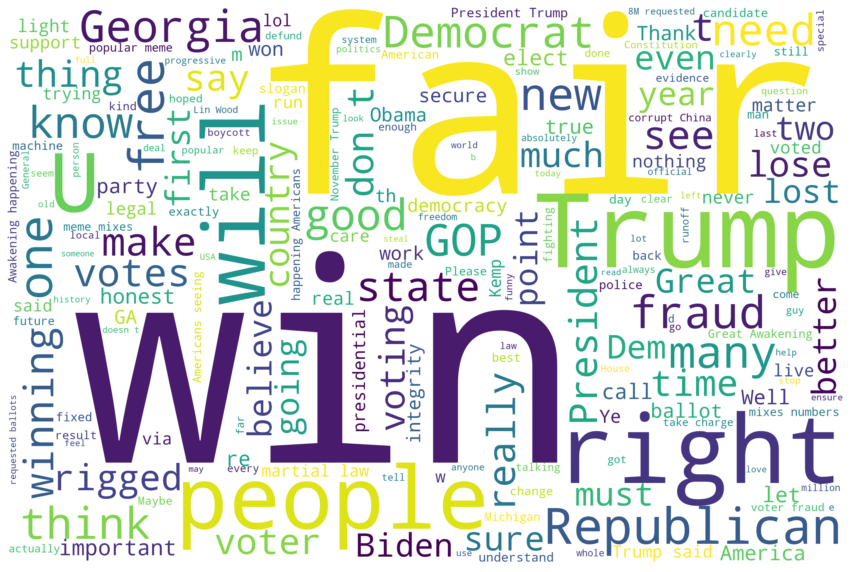

In [16]:
plotWordCloud(tweets_df['sentiment']=='positive')

**Neutral Tweets**


In [17]:
neutral_tweets = tweets_df.loc[tweets_df['sentiment'] == 'neutral']['clean_text']
neutral_tweets.sample(10)

9752    I said this before the Nov elections Activists let the opposition define the phrase never explaining fully what t
3688    REPUBLICANS DEMOCRATS &amp INDEPENDENTS VOTED TRUMP OUT THERE IS ELECTION INTEGRITY! THE ELECTION IS OVER        
6938    Georgia heading toward recount with slim margin between Biden and Trump #2020-elections                          
9566    If and his regime valued democracy they would've held elections &amp census this year Instead they're            
6886    you lost elections because you said "defund".                                                                    
788     DEFENDING the CONSTITUTION promised by TRUMP we see all the AFFIDAVITS that point to FRAUD                       
688     _truther They don’t poll you on it what happens is they hav                                                      
6132    Nope never done that Why do yo                                                                                   
4751    _Mama Earth to V

Below we will analyze neutral sentitment word distribution. 

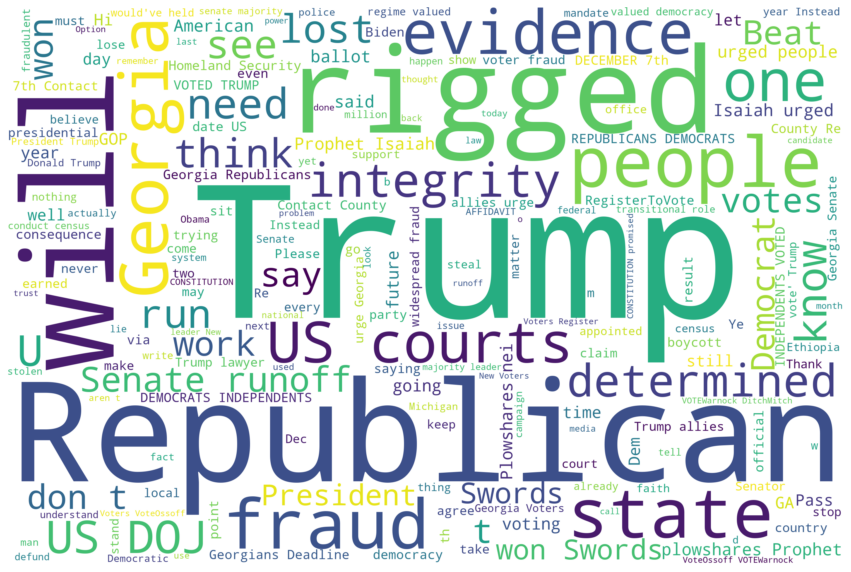

In [18]:
plotWordCloud(tweets_df['sentiment']=='neutral')


**Tweet Sentiment by Location**

Below is a plot of of each sentiment broken down by United States and Other Countries. <br> 
As expected, majority of the tweets in each sentiment category are from United States. 

In [19]:
tweets_by_location_sentiment = tweets_df.groupby(['sentiment', 'location'])['tweet_id'].count()
tweets_by_location_sentiment

sentiment  location
negative   Other       151 
           USA         950 
           Unknown     682 
neutral    Other       465 
           USA         2324
           Unknown     1756
positive   Other       334 
           USA         1894
           Unknown     1444
Name: tweet_id, dtype: int64

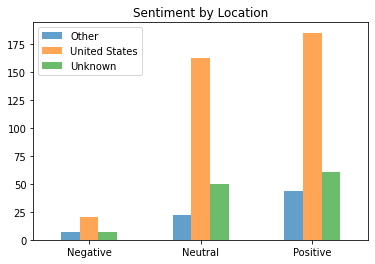

In [20]:
df = pd.DataFrame([['Positive','United States',185],['Positive','Other', 44],['Positive','Unknown',61],
                   ['Neutral','United States',162],['Neutral','Other',22],['Neutral','Unknown',50],
                   ['Negative','United States',20],['Negative','Other',7],['Negative','Unknown',7]
                  ],
                  columns=['group','column','val'])
ax = df.pivot("group", "column", "val").plot(kind='bar', title="Sentiment by Location", rot=0, alpha=0.7)
plt.legend()
plt.xlabel('')
plt.show()

### Models

We will build models using the following classifier to predict sentiment. 

    LogisticRegression
    KNeighborsClassifier
    SVC
    DecisionTreeClassifier
    RandomForestClassifier
    GaussianNB



In [21]:

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words))

tweets_df['sentiment']=tweets_df['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

tweets_df['clean_tweet']=tweets_df['text'].apply(lambda x: tweet_to_words(x))
tweets_df['Tweet_length']=tweets_df['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweets_df,test_size=0.2,random_state=42)

train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [22]:
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [23]:


Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True,gamma='auto'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GaussianNB()]



In [24]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.805
Accuracy of KNeighborsClassifieris 0.8255
Accuracy of SVCis 0.805
Accuracy of DecisionTreeClassifieris 0.905
Accuracy of RandomForestClassifieris 0.9025
Accuracy of GaussianNBis 0.668


Text(0.5, 1.0, 'Model Accuracy')

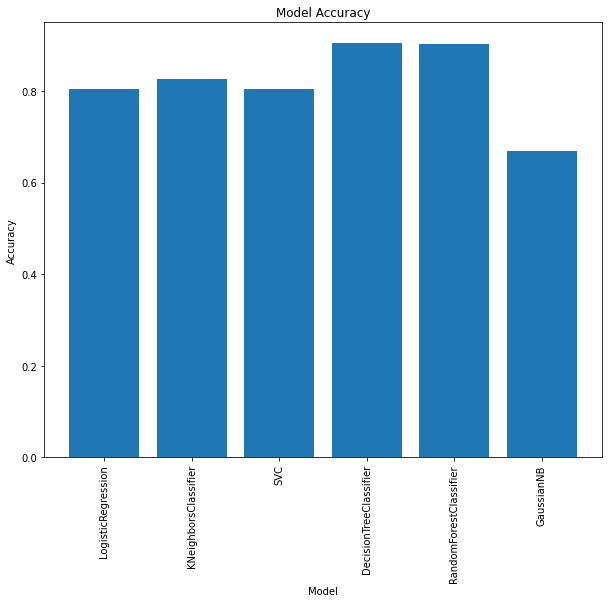

In [25]:
Index = [1,2,3,4,5,6]
plt.figure(5,figsize=(10, 8))
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracy')

In [26]:

Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [27]:

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print(classification_report(pred,test['sentiment']))
   
  

Accuracy of DecisionTreeClassifier is 0.908
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       368
           1       0.95      0.94      0.94      1632

    accuracy                           0.91      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.91      0.91      0.91      2000

Accuracy of RandomForestClassifier is 0.9025
              precision    recall  f1-score   support

           0       0.56      0.91      0.69       239
           1       0.99      0.90      0.94      1761

    accuracy                           0.90      2000
   macro avg       0.77      0.90      0.82      2000
weighted avg       0.93      0.90      0.91      2000



Based on the results above we see that DecisionTreeClassifier performs better than other classifiers.  Accurracy of  DecisionTreeClassifier is 0.9105

### References



https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generate/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
https://stackoverflow.com/questions/47796264/function-to-create-grouped-bar-plot
https://www.datacamp.com/community/tutorials/wordcloud-python
    